# Keşifsel Veri Analizi

## Veri Temizleme

Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle veri kümesini Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız.
Veri seti: https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

### Q1
Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [9]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# to display more (100) columns in pandas display() method
pd.set_option('display.max_columns', 100)

df = pd.read_csv('states_all.csv')

dfbackup = df.copy()


print('\nHer bir degiskenin tipi:')
print('=======================================')
df.info()

print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
df.isnull().mean()*100


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1918 non-null   object 
 1   STATE                         1918 non-null   object 
 2   YEAR                          1918 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 n

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          36.183525
TOTAL_REVENUE                   33.524505
FEDERAL_REVENUE                 33.524505
STATE_REVENUE                   33.524505
LOCAL_REVENUE                   33.524505
TOTAL_EXPENDITURE               33.524505
INSTRUCTION_EXPENDITURE         33.524505
SUPPORT_SERVICES_EXPENDITURE    33.524505
OTHER_EXPENDITURE               36.183525
CAPITAL_OUTLAY_EXPENDITURE      33.524505
GRADES_PK_G                     19.603754
GRADES_KG_G                     14.911366
GRADES_4_G                      14.911366
GRADES_8_G                      14.911366
GRADES_12_G                     14.911366
GRADES_1_8_G                    46.819604
GRADES_9_12_G                   44.160584
GRADES_ALL_G                    14.911366
AVG_MATH_4_SCORE                72.106361
AVG_MATH_8_SCORE                72.314911
AVG_READING_4_SCORE             72

### Q2
Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

- Asagidaki degiskenlerin null deger ortalamasi %50'nin altindadir, bu nedenle eksik degerler, degeri null olamayan verilerin soz konusu eyalet icindeki ortalamasi ile doldurulabilir.
ENROLL, TOTAL_REVENUE, FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, OTHER_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE, GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G, GRADES_1_8_G, GRADES_9_12_G, GRADES_ALL_G.

- Asagidaki degiskenlerin null deger oratalamasi %50'nin ustundedir (~%70), bu nedenle eksik degerler, degeri null olamayan verilerin soz konusu eyalet icindeki ortalamasi ile doldurulmasi bizi yanlis yonlendirecektir.
AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE.

### Q3
Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

---
***Data Cleaning First***
#### State isimleri

Iki kelimeli state isimleri iki defa gectiginden bu verilerin arindirilmasi gerekmektedir.

ABD eyalet sayisi: 51

Datasetimizdeki eyalet sayisi: 62

Mukerrer multiple word eyalet sayisi: 11



In [10]:
#### Bosluklu  ve altcizgili state isimlileriyle ayri ayri dataframe olusturulur ####
#####################################################################################

# make two list of duplicates that have spaces or underscores in its state name
list_of_spaced = []
list_of_underscored = []
for state in df.STATE.unique():
    if (' ' in state) == True:
        list_of_spaced.append(state)
    elif ('_' in state) == True:
        list_of_underscored.append(state)
#print(list_of_dups)

# concat the spaced(with space char in state name) states to form a new data frame ds
ds = pd.DataFrame()
for state in list_of_spaced:
    ds = pd.concat([ds,df.loc[df['STATE']== state]])
    
# concat the spaced(with space char in state name) states to form a new data frame du
du = pd.DataFrame()
for state in list_of_underscored:
    du = pd.concat([du,df.loc[df['STATE']== state]])

# replace spaces with '_' in STATE and PKEY columns
for state in list_of_spaced:
    #print(i.replace(' ','_'))
    ds = ds.replace(state , state.replace(' ','_'))
    for year in ds.YEAR.unique():
        pkey = str(year)+'_'+state
        ds = ds.replace(pkey , pkey.replace(' ','_'))
       
ds = ds.set_index('PRIMARY_KEY')
ds = ds.sort_index()

du = du.set_index('PRIMARY_KEY')
du = du.sort_index()

# see if there is fully null, droppable columns
ds.isnull().mean()*100    # there are many
du.isnull().mean()*100    # there are a few also

#### Olusturulan iki yeni dataframe fully null       #####
#### column lar drop edildikten sonra merge edilmeli #####
##########################################################

# make a drop column list for ds dataframe which has entirely null columns 
cnames = list(ds.columns)
droplist=[]
# start from the ENROLL column
for column in cnames[2:]:
    # check if the column is fully null
    if ds[column].isnull().mean() ==1 :
        droplist.append(column) 

# drop fully null columns in ds
ds.drop(columns=droplist, inplace = True)

# make new a drop column list for du dataframe which has entirely null columns 
droplist=[]
# start from the ENROLL column
for column in cnames[2:]:
    # check if the column is fully null
    if du[column].isnull().mean() ==1 :
        droplist.append(column)

# drop fully null columns in du
du.drop(columns=droplist, inplace = True)


# to merge using union of keys use 'outer' keyword 
dmerged = pd.merge(du, ds,'outer', on=['PRIMARY_KEY','STATE','YEAR'], suffixes=('_underscored', '_spaced'))


#### Underscored ve spaced satirlar orijinal dataframe den drop edilmeli ####
#############################################################################

# make list of duplicate primary keys which contains spaces or underscores
list_of_dup_states = []
for state in df.STATE.unique():
    if (' ' in state) == True or ('_' in state) == True:
        list_of_dup_states.append(state)

#print(list_of_dup_states)
# make a new dataframe which will include only single word states
dp = df.copy()
# set index to the primary key
dp = dp.set_index('PRIMARY_KEY')

# drop the rows that has multiple words in state name
# drop by comparing state, which contains spaces or underscores
for state in list_of_dup_states:
    dp.drop(dp[(dp['STATE'] == state)].index , inplace=True)


# sort by primary key index
dp=dp.sort_index()

# see if there is fully null droppable column
dp.isnull().mean()*100 # no there is not

dc = pd.concat([dp,dmerged])

                
dc.isnull().mean()*100
#dc=dc.sort_index()


# after concat operation and end of the data cleaning see the percentage of null values
# all of the columns' percentage dropped and some of them are zeroed

print('Comparing of percentage of null values :')
print('\t\t\t\t\tInitial Data Set\t\tFinal Data Set')
print('\t\t\t\t\t================\t\t===============')

di = df.copy()
di = di.set_index('PRIMARY_KEY')
di = di.sort_index()

columns = di.columns
for column in columns[2:]:
    print("{:<35} \t {:.2f} \t\t {:.2f}".format(column, di.isnull().mean()[[column]][0]*100, dc.isnull().mean()[[column]][0]*100))

    
dc.to_csv('states_all_clean.csv')
dc


Comparing of percentage of null values :
					Initial Data Set		Final Data Set
					================		===============
ENROLL                              	 36.18 		 25.00
TOTAL_REVENUE                       	 33.52 		 21.88
FEDERAL_REVENUE                     	 33.52 		 21.88
STATE_REVENUE                       	 33.52 		 21.88
LOCAL_REVENUE                       	 33.52 		 21.88
TOTAL_EXPENDITURE                   	 33.52 		 21.88
INSTRUCTION_EXPENDITURE             	 33.52 		 21.88
SUPPORT_SERVICES_EXPENDITURE        	 33.52 		 21.88
OTHER_EXPENDITURE                   	 36.18 		 25.00
CAPITAL_OUTLAY_EXPENDITURE          	 33.52 		 21.88
GRADES_PK_G                         	 19.60 		 5.51
GRADES_KG_G                         	 14.91 		 0.00
GRADES_4_G                          	 14.91 		 0.00
GRADES_8_G                          	 14.91 		 0.00
GRADES_12_G                         	 14.91 		 0.00
GRADES_1_8_G                        	 46.82 		 37.50
GRADES_9_12_G                       	 4

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,,,,
1986_ALABAMA,ALABAMA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53672.0,56939.0,57261.0,45396.0,NaN,NaN,733735.0,NaN,NaN,NaN,NaN
1986_ALASKA,ALASKA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10334.0,8706.0,7313.0,6753.0,NaN,NaN,107848.0,NaN,NaN,NaN,NaN
1986_ARIZONA,ARIZONA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43759.0,40187.0,38060.0,35777.0,NaN,NaN,534538.0,NaN,NaN,NaN,NaN
1986_ARKANSAS,ARKANSAS,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34070.0,32799.0,34053.0,28729.0,NaN,NaN,437438.0,NaN,NaN,NaN,NaN
1986_CALIFORNIA,CALIFORNIA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380608.0,325902.0,304787.0,251281.0,NaN,NaN,4377989.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991_NORTH_DAKOTA,NORTH_DAKOTA,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,657.0,9273.0,9575.0,8929.0,7821.0,NaN,NaN,118376.0,NaN,NaN,NaN,NaN
1991_RHODE_ISLAND,RHODE_ISLAND,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369.0,10680.0,11122.0,10053.0,8277.0,NaN,NaN,142144.0,NaN,NaN,NaN,NaN
1991_SOUTH_CAROLINA,SOUTH_CAROLINA,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43587.0,52206.0,47352.0,34638.0,NaN,NaN,627470.0,NaN,NaN,NaN,NaN


#### Eksik degerleri artik doldurabiliriz. :)

***Ortalama (Mean) yontemi***

In [11]:
dmean = dc.copy()
# fill the null values with means of the columns
for column in dmean.columns:
    # check if it is suitable to calculate its mean; float 
    if dmean[column].dtype == 'float64' :
        dmean[column].fillna(dmean[column].mean(), inplace=True)

# check for the filled values
display(dmean.loc[dmean['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].head(8))
display(dmean.loc[dmean['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].tail(3))

,TOTAL_REVENUE
PRIMARY_KEY,
1986_CALIFORNIA,9.102045e+06
1987_CALIFORNIA,9.102045e+06
1988_CALIFORNIA,9.102045e+06
1989_CALIFORNIA,9.102045e+06
1990_CALIFORNIA,9.102045e+06
1991_CALIFORNIA,9.102045e+06
1992_CALIFORNIA,2.626002e+07
1993_CALIFORNIA,2.804334e+07


,TOTAL_REVENUE
PRIMARY_KEY,
2015_CALIFORNIA,7.824804e+07
2016_CALIFORNIA,8.921726e+07
2017_CALIFORNIA,9.102045e+06


In [12]:
dmean.isnull().mean()*100

STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### Q4

Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

---
***Lineer enterpolasyon***

In [13]:
dl = dc.copy()
# fill the null values with means of the columns
for column in dl.columns:
    # check if it is suitable to calculate its mean; float 
    if dl[column].dtype == 'float64' :
        dl[column].interpolate(method='linear', limit_direction='both', inplace=True)
        
# check for the filled values
display(dl.loc[dl['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].head(8))
display(dl.loc[dl['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].tail(3))

,TOTAL_REVENUE
PRIMARY_KEY,
1986_CALIFORNIA,2678885.0
1987_CALIFORNIA,2678885.0
1988_CALIFORNIA,2678885.0
1989_CALIFORNIA,2678885.0
1990_CALIFORNIA,2678885.0
1991_CALIFORNIA,2678885.0
1992_CALIFORNIA,26260025.0
1993_CALIFORNIA,28043338.0


,TOTAL_REVENUE
PRIMARY_KEY,
2015_CALIFORNIA,7.824804e+07
2016_CALIFORNIA,8.921726e+07
2017_CALIFORNIA,1.881841e+06


In [14]:
dl.isnull().mean()*100

STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

***Time enterpolasyon***

In [15]:
# index must be datetime index
dftime = dc.copy()

# use this when importing as datetime index
#dftime = pd.read_csv('states_all.csv', index_col='YEAR', parse_dates=True)

# change index to time
dftime['PRIMARY_KEY']=dftime.index
dftime = dftime.set_index('YEAR')
dftime = dftime.sort_index()
dftime.index = pd.to_datetime(dftime.index, format='%Y')
# time interpolation
for column in dftime.columns:
    # check if it is suitable to calculate its mean; float 
    if dftime[column].dtype == 'float64' :
        dftime[column].interpolate(method='time', inplace=True)

# check for the filled values
display(dftime.loc[dftime['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].head(8))
display(dftime.loc[dftime['STATE']=='CALIFORNIA',['TOTAL_REVENUE']].tail(3))

,TOTAL_REVENUE
YEAR,
1986-01-01,NaN
1987-01-01,NaN
1988-01-01,NaN
1989-01-01,NaN
1990-01-01,NaN
1991-01-01,NaN
1992-01-01,26260025.0
1993-01-01,28043338.0


,TOTAL_REVENUE
YEAR,
2015-01-01,78248042.0
2016-01-01,89217262.0
2017-01-01,1455737.0


In [16]:
dftime.isnull().mean()*100

STATE                            0.000000
ENROLL                          21.875000
TOTAL_REVENUE                   18.750000
FEDERAL_REVENUE                 18.750000
STATE_REVENUE                   18.750000
LOCAL_REVENUE                   18.750000
TOTAL_EXPENDITURE               18.750000
INSTRUCTION_EXPENDITURE         18.750000
SUPPORT_SERVICES_EXPENDITURE    18.750000
OTHER_EXPENDITURE               21.875000
CAPITAL_OUTLAY_EXPENDITURE      18.750000
GRADES_PK_G                      0.122549
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                    34.375000
GRADES_9_12_G                   34.375000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                18.750000
AVG_MATH_8_SCORE                18.750000
AVG_READING_4_SCORE             18.750000
AVG_READING_8_SCORE             18.872549
PRIMARY_KEY                      0

---
***Hybrid (Manuel-Lineer/Time) Yontem***

Eksik verilerin onceki degerlerinden indisi en dusuk olan ve sonraki degerlerden indisi en yuksek olan veri elle doldurulur sonra lineer ya da zaman enterpolasyonu uygulanir. En tutarli yontemin bu oldugu gozlenmektedir.

### Q5

İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

### Solution

- ***Ortalama*** alarak doldurmak mantikli degil cunku tum eyaletlerin ortalamasini alarak dolduruyoruz. Yil bazinda veriyi gruplasak dahi eksik olan veri zaten yil bazinda, mesela 1989-1992 yillari arasindaki cogu sutun tamamen null, dolayisiyla ortalamasini yillar bazinda alamiyoruz. Genel ortalama alirsak da yanlis bir yaklasim oluyor.

- ***Lineer enterpolasyon*** onceki ve sonraki degerlere bakarak doldurdugu icin zamana bagli degisen bir veri icin daha uygun oldugu gozukuyor. Ancak burada da onceki ya da sonraki verilerin de null oldugu durumlarda 'limit direction = both' ile eksiklikler doldurulsa bile onceki ve/veya sonraki veri yoksa verilerin egilimini tam olarak cikaramiyor.

- ***Zaman enterpolasyon***, dataframe import edilirken datetime verisi ile indexlenirse zaman kullanilabiliyor ancak bazi veriler doldurulamiyor. Onceki ve/veya sonraki veri yoksa verilerin egilimi tam olarak cikarilamiyor.

- ***Hybrid yontem***, onceki ya da sonraki verilerin olmadigi durumlarda bu veriler manuel (dongu ile) doldurulduktan sonra lineer ya da zamana gore enterpolasyonun en yugun yontem oldugu gorunuyor.

### Notlar

#### Degiskenlere gore tamamen null degerlerden olusmayan yillar. 

Asagidaki kod parcasi ile tespit edilmistir.

```df.loc[df['ENROLL'].isnull() == False].groupby('YEAR').mean().index```

TOTAL_VERI: 1986-2017  32 yil

- ENROLL : 1993-2016

- TOTAL_REVENUE, FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, : 1992-2016,

- TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE, SUPPORT_SERVICES_EXPENDITURE, CAPITAL_OUTLAY_EXPENDITURE : 1992-2016, 

- OTHER_EXPENDITURE: 1993-2016

- GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G, GRADES_ALL_G: 1986-2017,

- GRADES_1_8_G, GRADES_9_12_G  : 1997-2016

In [17]:
# for dongusu ile yapilabilir
#for i in df.columns:
#    print(i+'\n',df.loc[df[i].isnull() == False].groupby('YEAR').mean().index)

#### ABD ve Herhangi bir state karsilastirmasi
ABD'nin ortalamasini almak eksik verileri doldururken uygun olamayabilir. 

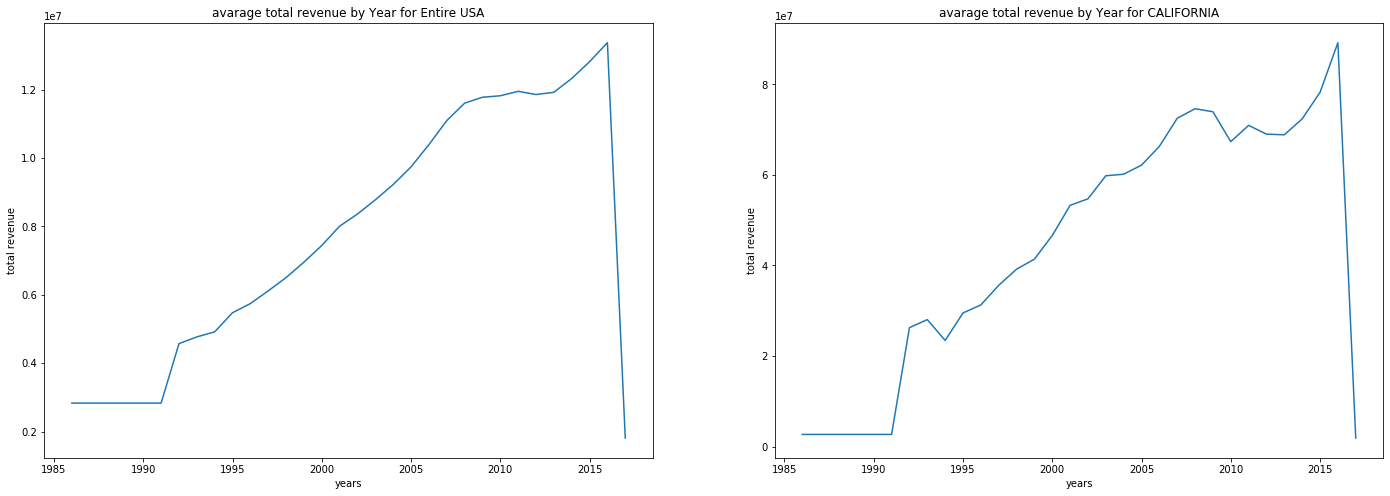

In [18]:
dpl = dl

col = dpl.loc[dpl['TOTAL_REVENUE'].isnull() == False].groupby('YEAR').mean()[['TOTAL_REVENUE']]

plt.figure(figsize=[24,8])
plt.subplot(121)
plt.plot(col.index,col.values)
plt.title('avarage total revenue by Year for Entire USA')
plt.xlabel('years')
plt.ylabel('total revenue')

colstate = dpl.loc[dpl['TOTAL_REVENUE'].isnull() == False].loc[dpl['STATE']=='CALIFORNIA'].groupby('YEAR').mean()[['TOTAL_REVENUE']]

plt.subplot(122)
plt.title('avarage total revenue by Year for CALIFORNIA')
plt.xlabel('years')
plt.ylabel('total revenue')
plt.plot(colstate.index,colstate.values)
plt.show()
